In [4]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import numpy as np

from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import gdown
import zipfile
import os

# Load Model

In [14]:
def download_model(extract_path = "models/"):
    file_id = '1WYkuOxW9wg442Gbsw93vh3Vyh9qoWb4r'
    destination = 'model.zip'
    url = f'https://drive.google.com/uc?id={file_id}'

    gdown.download(url, destination, quiet=False)
    with zipfile.ZipFile(destination, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    extracted_files = os.listdir(extract_path)
    print(extracted_files)
    os.remove(destination)
    return extract_path

In [15]:
extract_path = "../models/"
save_path = download_model(extract_path)
save_path = os.path.join(save_path, "model_zip")
best_model = ClassificationModel(
    "distilbert",
    save_path,
    use_cuda=False
)

Downloading...
From (original): https://drive.google.com/uc?id=1WYkuOxW9wg442Gbsw93vh3Vyh9qoWb4r
From (redirected): https://drive.google.com/uc?id=1WYkuOxW9wg442Gbsw93vh3Vyh9qoWb4r&confirm=t&uuid=8e37b2b2-bfb2-4e2a-b8ca-aab1aeef8b8b
To: /Users/metissotangkur/Desktop/advanced_computing/nlp/coursework/dontpatronizeme/code/model.zip
100%|██████████| 247M/247M [00:07<00:00, 32.7MB/s] 


['model_zip', '__MACOSX']


In [7]:
file_id = "1XOafk3wcP2RcTu1MHXoR_IJBIZseqTn8"
url = f"https://drive.google.com/uc?id={file_id}"

train_model_df = pd.read_csv(url, sep="\t")
train_model_df = train_model_df.loc[:, ~train_model_df.columns.str.contains('^Unnamed')]
train_df, val_df, _, _ = train_test_split(
    train_model_df,
    train_model_df["target_flag"],
    test_size=0.2,
    random_state=42,
    stratify=train_model_df["target_flag"]
)

print(f"train size: {len(train_df)}, target_rate: {train_df.agg({'target_flag': 'mean'})}")
print(f"val size: {len(val_df)}, target_rate: {val_df.agg({'target_flag': 'mean'})}")

train size: 6700, target_rate: target_flag    0.094776
dtype: float64
val size: 1675, target_rate: target_flag    0.094925
dtype: float64


In [4]:
cols = ["text", "target_flag"]
val_pred, val_raw_outputs = best_model.predict(val_df["text"].tolist())

  0%|          | 0/3 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/17 [00:00<?, ?it/s]

# Load Data

In [10]:
dev_df = pd.read_csv("../data/dev_df_2.csv", sep="\t")
dev_df.head()

,Unnamed: 0,par_id,art_id,keyword,country_code,text,label,target_flag,weights
0,0,107,@@16900972,homeless,ke,"His present "" chambers "" may be quite humble ,...",3,1.0,1
1,1,149,@@1387882,disabled,us,Krueger recently harnessed that creativity to ...,2,1.0,1
2,2,151,@@19974860,poor-families,in,10:41am - Parents of children who died must ge...,3,1.0,1
3,3,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4,1.0,1
4,4,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,1.0,1


In [7]:
dev_df.loc[dev_df["text"].isna(), "text"] = ""

In [8]:
dev_df.groupby("label").agg({"weights":"sum"})

,weights
label,
0,1704
1,191
2,18
3,89
4,92


In [9]:
dev_text_list = dev_df['text'].tolist()

dev_pred, dev_raw_outputs = best_model.predict(dev_text_list)

  0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/21 [00:00<?, ?it/s]

In [10]:
prob = softmax(dev_raw_outputs, axis=1)[:, 1]
dev_df["prob"] = prob

# Q1 
To what extent is the model better at predicting examples with a higher level of patronising content? Justify your answer

In [11]:
dev_df['label'] = dev_df['label'].astype('category')

In [12]:
(
    dev_df
    .groupby("label")
    .agg(
        count = pd.NamedAgg(column="weights", aggfunc="sum"),
        prob_mean = pd.NamedAgg(column="prob", aggfunc="mean"),
        prob_std = pd.NamedAgg(column="prob", aggfunc="std"),
    )
).to_csv("lvl_mean_std.csv")

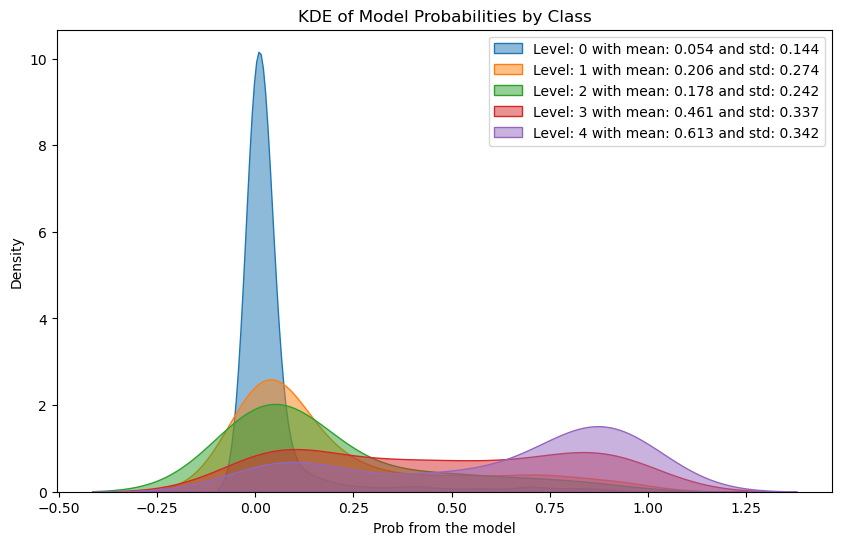

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))  

for label in range(5):
    prob_list = dev_df.loc[dev_df["label"] == label, "prob"]
    prob_arr = np.array(prob_list)
    mean = prob_arr.mean()
    std = prob_arr.std()

    sns.kdeplot(data=prob_list, common_norm=False, fill=True, alpha=0.5, ax=ax, label=f"Level: {label} with mean: {mean:.3f} and std: {std:.3f}")

ax.set_title('KDE of Model Probabilities by Class')
ax.set_xlabel('Prob from the model')
ax.set_ylabel('Density')
ax.legend()

plt.show()

# Q2

In [14]:
dev_df["text_length"] = dev_df["text"].str.len()
_, q_bin = pd.qcut(dev_df["text_length"], q=10, retbins=True)
q_bin[0] = -np.inf
q_bin[-1] = np.inf

dev_df.loc[:, "text_length_bin"] = pd.cut(dev_df["text_length"], q_bin)
dev_df.head()

,Unnamed: 0,par_id,art_id,keyword,country_code,text,label,target_flag,weights,prob,text_length,text_length_bin
0,0,107,@@16900972,homeless,ke,"His present "" chambers "" may be quite humble ,...",3,1.0,1,0.047235,394,"(352.0, 443.7]"
1,1,149,@@1387882,disabled,us,Krueger recently harnessed that creativity to ...,2,1.0,1,0.071496,296,"(295.0, 352.0]"
2,2,151,@@19974860,poor-families,in,10:41am - Parents of children who died must ge...,3,1.0,1,0.796367,138,"(116.0, 153.0]"
3,3,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4,1.0,1,0.747670,496,"(443.7, inf]"
4,4,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,1.0,1,0.049807,601,"(443.7, inf]"


In [17]:
def calculate_metrics(group):
    true_labels = group['target_flag']
    predicted_probs = group['prob']
    # If 'prob' is a probability, we'll need to convert it to a binary outcome for F1 score
    predicted_labels = (predicted_probs >= 0.5).astype(int)  # Using 0.5 as the threshold
    f1 = f1_score(true_labels, predicted_labels)
    auc = roc_auc_score(true_labels, predicted_probs)
    cnt = len(group)
    return pd.Series({"count": cnt, "prob_mean": predicted_probs.mean(), "prob_std": predicted_probs.std(), 'f1': f1, 'auc': auc})

# Group by 'text_length_bin' and apply the custom metrics function
metrics_by_group = dev_df.groupby('text_length_bin').apply(calculate_metrics)

metrics_by_group

,count,prob_mean,prob_std,f1,auc
text_length_bin,,,,,
"(-inf, 116.0]",211.0,0.130000,0.253106,0.500000,0.900544
"(116.0, 153.0]",217.0,0.118812,0.255341,0.558140,0.969637
"(153.0, 178.0]",206.0,0.119119,0.251571,0.600000,0.956656
"(178.0, 205.0]",206.0,0.114248,0.239579,0.536585,0.877992
"(205.0, 228.5]",207.0,0.101888,0.235287,0.611111,0.821576
"(228.5, 260.0]",210.0,0.097789,0.217821,0.628571,0.904297
"(260.0, 295.0]",210.0,0.094485,0.214959,0.545455,0.906572
"(295.0, 352.0]",209.0,0.094346,0.199767,0.388889,0.903986
"(352.0, 443.7]",208.0,0.128165,0.237435,0.339623,0.832919


In [18]:
metrics_by_group.to_csv("text_length_bin.csv")

In [19]:
metrics_by_kw = dev_df.groupby('keyword').apply(calculate_metrics)
metrics_by_kw

,count,prob_mean,prob_std,f1,auc
keyword,,,,,
disabled,194.0,0.075513,0.180691,0.500000,0.846429
homeless,212.0,0.163230,0.265406,0.482759,0.856604
hopeless,217.0,0.140150,0.240647,0.520000,0.870721
immigrant,218.0,0.027244,0.087462,0.250000,0.976980
in-need,226.0,0.210980,0.340637,0.692308,0.941435
migrant,207.0,0.022875,0.084269,0.571429,0.918812
poor-families,190.0,0.186397,0.285618,0.500000,0.749654
refugee,188.0,0.093759,0.201480,0.428571,0.891429
vulnerable,209.0,0.114506,0.244517,0.511628,0.935450


In [20]:
metrics_by_kw.to_csv("kw_bin.csv")